In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import random
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
image_folder = '/content/drive/MyDrive/BSR/BSDS500/data/images/test/'

In [4]:
image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]
print(f"Found {len(image_files)} images.")

Found 200 images.


In [5]:
import random
sample_files = random.sample(image_files, 5)

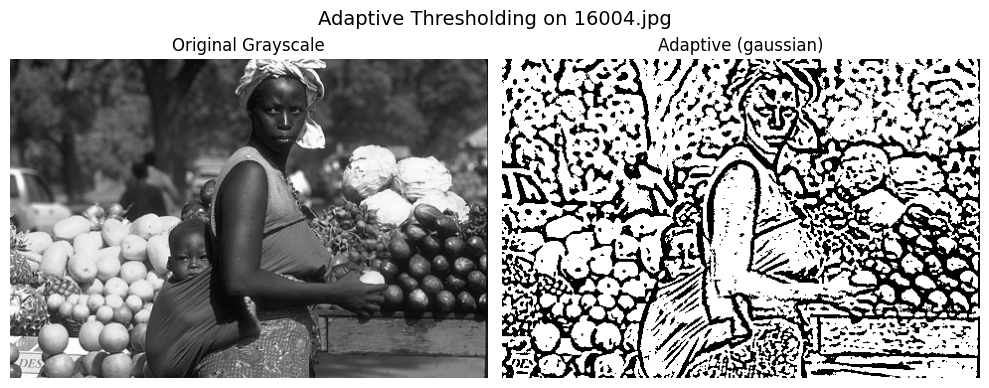

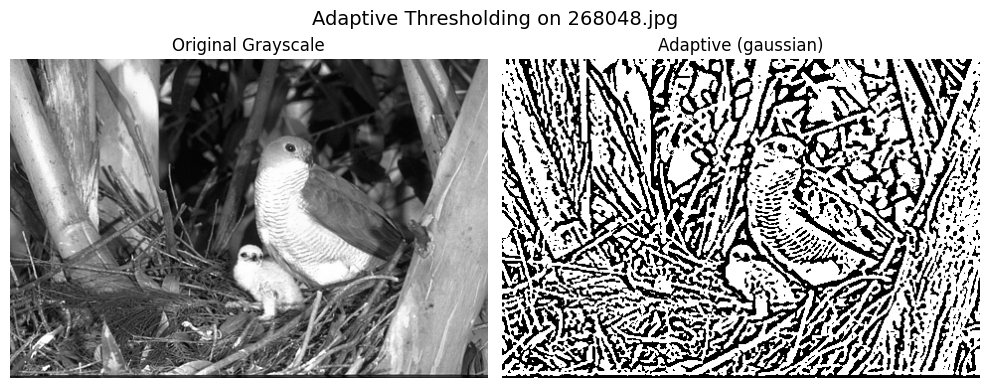

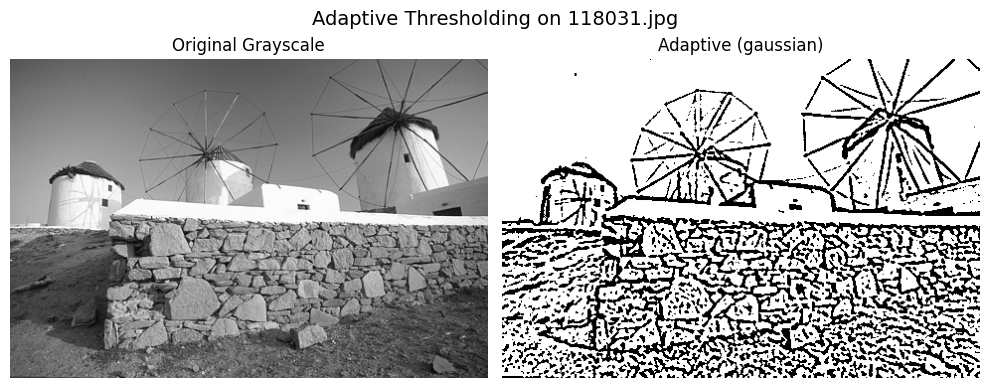

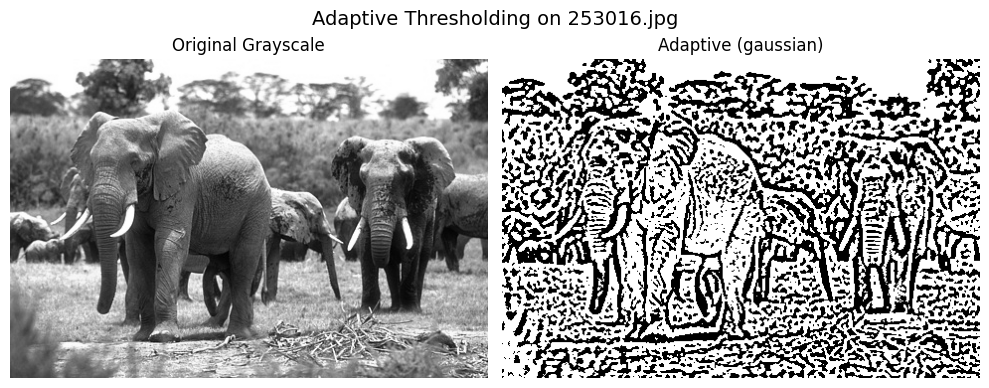

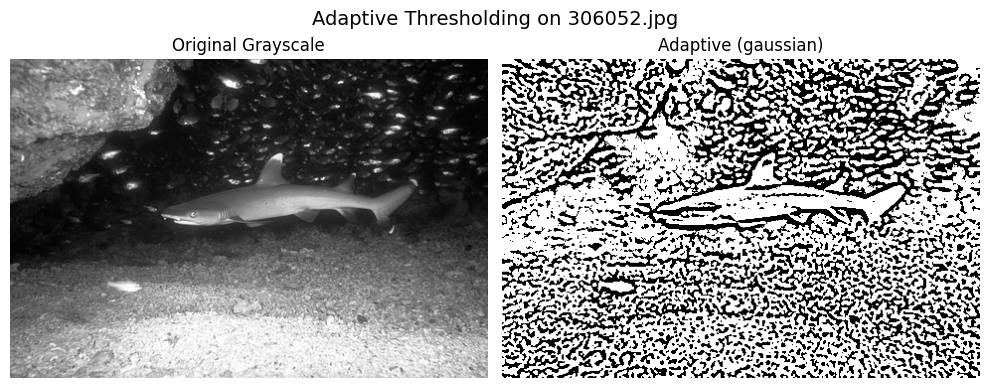

In [6]:
for img_name in sample_files:
    img_path = os.path.join(image_folder, img_name)

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply light Gaussian blur (same as before)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    # --- Adaptive Thresholding (replace Otsu here) ---
    # Choose method: "mean" or "gaussian"
    METHOD = "gaussian"
    BLOCK_SIZE = 11  # must be odd and >=3
    C = 2            # subtractive constant

    adaptive_method = (cv2.ADAPTIVE_THRESH_GAUSSIAN_C
                       if METHOD.lower() == "gaussian"
                       else cv2.ADAPTIVE_THRESH_MEAN_C)

    adaptive = cv2.adaptiveThreshold(
        blur, 255, adaptive_method,
        cv2.THRESH_BINARY, BLOCK_SIZE, C
    )

    # --- Plot results ---
    plt.figure(figsize=(10, 4))
    plt.suptitle(f"Adaptive Thresholding on {img_name}", fontsize=14)

    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title('Original Grayscale')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(adaptive, cmap='gray')
    plt.title(f"Adaptive ({METHOD})")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
